In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!pip install kaggle

In [ ]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


Importing Face Mask Dataset

In [ ]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 96% 157M/163M [00:01<00:00, 91.9MB/s]
100% 163M/163M [00:01<00:00, 105MB/s] 


In [ ]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
!ls

data  face-mask-dataset.zip  sample_data


**Importing the Dependencies**

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [ ]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_2747.jpg', 'with_mask_2547.jpg', 'with_mask_1154.jpg', 'with_mask_16.jpg', 'with_mask_2539.jpg']
['with_mask_1260.jpg', 'with_mask_3496.jpg', 'with_mask_539.jpg', 'with_mask_2499.jpg', 'with_mask_742.jpg']


In [ ]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_2828.jpg', 'without_mask_2701.jpg', 'without_mask_3064.jpg', 'without_mask_2617.jpg', 'without_mask_576.jpg']
['without_mask_305.jpg', 'without_mask_2603.jpg', 'without_mask_76.jpg', 'without_mask_699.jpg', 'without_mask_3508.jpg']


In [ ]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


**Creating Labels for the two class of Images**

with mask  -->  1

without mask  -->  0

In [ ]:
# create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [ ]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [ ]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [ ]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


**Displaying the Images**

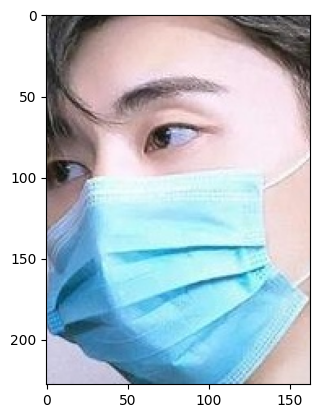

In [ ]:
# displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_1545.jpg')
imgplot = plt.imshow(img)
plt.show()

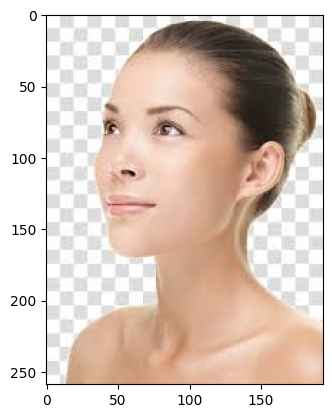

In [ ]:
# displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_2925.jpg')
imgplot = plt.imshow(img)
plt.show()

**Image Processing**

1. Resize the Images

2. Convert the images to numpy arrays

In [ ]:
with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(os.path.join(with_mask_path, img_file)) # Fixed path construction
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(os.path.join(without_mask_path, img_file)) # Fixed path construction
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
type(data)

list

In [ ]:
len(data)

7553

array([[[252, 252, 254],
        [252, 252, 254],
        [252, 252, 254],
        ...,
        [252, 252, 252],
        [252, 252, 252],
        [252, 252, 252]],

       [[252, 252, 254],
        [252, 252, 254],
        [252, 252, 254],
        ...,
        [252, 252, 252],
        [252, 252, 252],
        [252, 252, 252]],

       [[252, 252, 254],
        [252, 252, 254],
        [252, 252, 254],
        ...,
        [252, 252, 252],
        [252, 252, 252],
        [252, 252, 252]],

       ...,

       [[219, 232, 247],
        [230, 245, 255],
        [111, 127, 145],
        ...,
        [ 26,  24,  45],
        [ 27,  25,  46],
        [ 32,  30,  52]],

       [[218, 234, 248],
        [214, 230, 242],
        [ 56,  73,  92],
        ...,
        [ 25,  23,  44],
        [ 25,  23,  44],
        [ 30,  28,  49]],

       [[222, 239, 253],
        [171, 188, 203],
        [ 30,  45,  64],
        ...,
        [ 23,  21,  42],
        [ 26,  24,  45],
        [ 30,  28,  49]]], dtype=uint8)
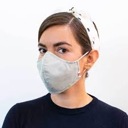

In [ ]:
data[0]

In [ ]:
type(data[0])

numpy.ndarray

In [ ]:
data[0].shape

(128, 128, 3)

In [ ]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [ ]:
type(X)

numpy.ndarray

In [ ]:
type(Y)

numpy.ndarray

In [ ]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [ ]:
print(Y)

[1 1 1 ... 0 0 0]


**Train Test Split**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [ ]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

array([[[ 80, 166, 153],
        [ 80, 166, 153],
        [ 80, 166, 153],
        ...,
        [ 97, 175, 159],
        [ 95, 174, 159],
        [ 95, 174, 159]],

       [[ 79, 165, 152],
        [ 81, 167, 154],
        [ 81, 167, 154],
        ...,
        [ 97, 175, 159],
        [ 97, 175, 159],
        [ 96, 174, 158]],

       [[ 81, 167, 154],
        [ 81, 167, 154],
        [ 81, 167, 154],
        ...,
        [ 97, 175, 159],
        [ 97, 175, 159],
        [ 97, 174, 159]],

       ...,

       [[ 26,  24,  27],
        [ 29,  26,  30],
        [ 28,  26,  29],
        ...,
        [ 38,  32,  35],
        [ 39,  33,  35],
        [ 39,  33,  36]],

       [[ 25,  24,  27],
        [ 28,  25,  28],
        [ 29,  24,  28],
        ...,
        [ 39,  33,  37],
        [ 39,  33,  36],
        [ 40,  34,  36]],

       [[ 27,  26,  28],
        [ 29,  26,  29],
        [ 30,  25,  29],
        ...,
        [ 38,  32,  36],
        [ 39,  33,  36],
        [ 39,  33,  35]]], dtype=uint8)
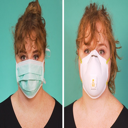

In [ ]:
X_train[0]

In [ ]:
X_train_scaled[0]

array([[[0.31372549, 0.65098039, 0.6       ],
        [0.31372549, 0.65098039, 0.6       ],
        [0.31372549, 0.65098039, 0.6       ],
        ...,
        [0.38039216, 0.68627451, 0.62352941],
        [0.37254902, 0.68235294, 0.62352941],
        [0.37254902, 0.68235294, 0.62352941]],

       [[0.30980392, 0.64705882, 0.59607843],
        [0.31764706, 0.65490196, 0.60392157],
        [0.31764706, 0.65490196, 0.60392157],
        ...,
        [0.38039216, 0.68627451, 0.62352941],
        [0.38039216, 0.68627451, 0.62352941],
        [0.37647059, 0.68235294, 0.61960784]],

       [[0.31764706, 0.65490196, 0.60392157],
        [0.31764706, 0.65490196, 0.60392157],
        [0.31764706, 0.65490196, 0.60392157],
        ...,
        [0.38039216, 0.68627451, 0.62352941],
        [0.38039216, 0.68627451, 0.62352941],
        [0.38039216, 0.68235294, 0.62352941]],

       ...,

       [[0.10196078, 0.09411765, 0.10588235],
        [0.11372549, 0.10196078, 0.11764706],
        [0.10980392, 0

**Building a Convolutional Neural Networks (CNN)**

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [ ]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 16s 53ms/step - acc: 0.6823 - loss: 0.6480 - val_acc: 0.8893 - val_loss: 0.2535
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - acc: 0.8730 - loss: 0.3082 - val_acc: 0.9174 - val_loss: 0.1919
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - acc: 0.9061 - loss: 0.2479 - val_acc: 0.9240 - val_loss: 0.1649
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - acc: 0.9223 - loss: 0.2099 - val_acc: 0.9388 - val_loss: 0.1646
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - acc: 0.9322 - loss: 0.1745 - val_acc: 0.9537 - val_loss: 0.1295


**Model Evaluation**

In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - acc: 0.9272 - loss: 0.2004
Test Accuracy = 0.9358041286468506


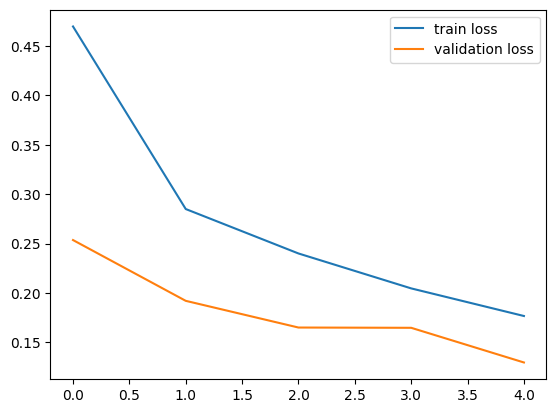

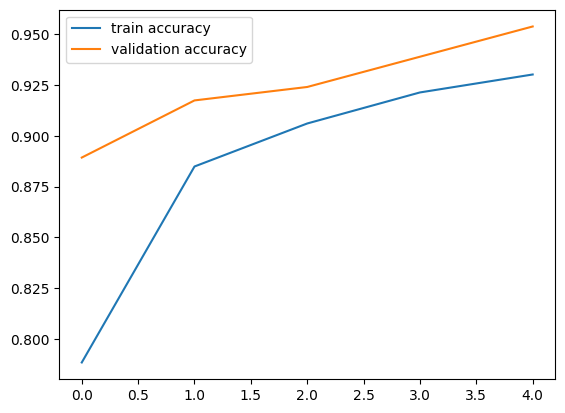

In [ ]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

**Predictive System**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


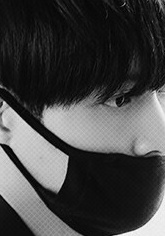

Prediction: Wearing Mask


In [ ]:
import cv2
import numpy as np
from google.colab import drive
from google.colab.patches import cv2_imshow

def predict_mask(image_path):
  # Load the image and preprocess it
  img = cv2.imread(image_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img = cv2.resize(img, (128, 128))
  img = img / 255.0  # Scale pixel values
  img = np.expand_dims(img, axis=0)  # Add batch dimension

  # Make the prediction
  prediction = model.predict(img)
  predicted_class = np.argmax(prediction)

  # Return the prediction
  if predicted_class == 1:
    return "Wearing Mask"
  else:
    return "No Mask"

# Get the image path from the user
image_path = input("Enter the path to the image in your Dataset: ")

# Predict the mask status
prediction = predict_mask(image_path)

# Display the image and prediction
img = cv2.imread(image_path)
cv2_imshow(img)
print(f"Prediction: {prediction}")